## importing all library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

## loading the dataset

In [3]:
df=pd.read_csv("creditcard.csv")

## display top 5 record from the dataset

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## display bottom 5 record from the dataset

In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## finding the shape of dataset

In [6]:
df.shape

(284807, 31)

## displaying the data in statistical manner

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## get the information about dataset like total row ,column and other datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## finding null values

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## finding all columns

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## finding all unique value for each column

In [11]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

## finding duplicates value

In [12]:
df.duplicated().sum()

1081

In [13]:
df.duplicated().any()

True

## drop the duplicated value

In [14]:
dff=df.drop_duplicates()

In [15]:
dff.shape

(283726, 31)

In [16]:
dff.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
pd.options.display.max_columns=None

## feature scaling the amount column using standardscaler

In [18]:
ss=StandardScaler()

In [19]:
dff["Amount"]=ss.fit_transform(dff[["Amount"]])

In [20]:
dff.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


## droping the Time column from dataset

In [21]:
dff.drop("Time",axis=1,inplace=True)

In [22]:
dff["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

## making coutplot on class column from dataset

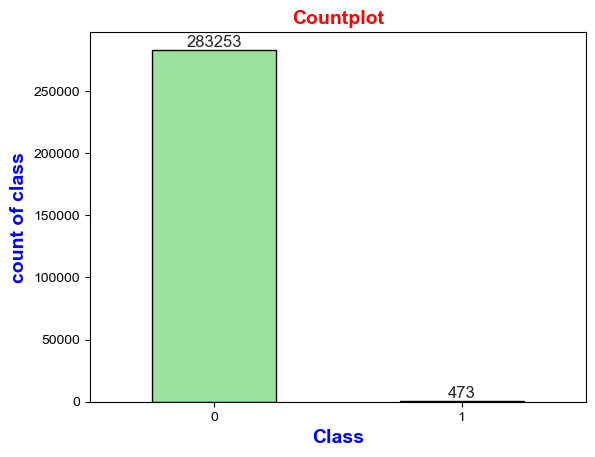

In [23]:
c=sb.countplot(data=dff,x="Class",edgecolor="black",width=0.5,color="lightgreen")
sb.set(style="dark")
plt.xlabel("Class",fontname="Arial",fontsize=14,weight="bold",c="blue")
plt.ylabel("count of class",fontname="Arial",fontsize=14,weight="bold",c="blue")
plt.title("Countplot",fontname="Arial",fontsize=14,weight="bold",c="red")
for bar in c.containers:
    c.bar_label(bar)




As we can see from above table the target column consist **two classes** where the 0 class is higher count as compare to 1's class.Here the data of target column is highly imbalanced data.

## consequences of inbalanaced data

In [24]:
dff.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


## selecting the independent features and target column from our dataset

In [25]:
x=dff.drop("Class",axis=1)
y=dff["Class"]

In [26]:
x.shape

(283726, 29)

In [27]:
y.shape

(283726,)

## we split the data train the model with 70% and test the model with 30% using model selection

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
xtrain.shape

(198608, 29)

In [30]:
xtest.shape

(85118, 29)

## we train the model by logistic regression

In [31]:
lr=LogisticRegression()

In [32]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [33]:
y_pred=lr.predict(xtest)

In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
dict={"actual ouput":ytest,"predict output":y_pred}

In [36]:
dict=pd.DataFrame(dict)

In [37]:
dict

,actual ouput,predict output
104697,0,0
134356,0,0
42637,0,0
882,0,0
263275,0,0
...,...,...
67295,0,0
106097,0,0
126023,0,0
228348,0,0


## creating a custom function

In [38]:
def create_model(model):
    model.fit(xtrain,ytrain)
    y_pred=model.predict(xtest)
    print(classification_report(ytest,y_pred))
    print(confusion_matrix(ytest,y_pred))
    return model

In [39]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.55      0.67       134

    accuracy                           1.00     85118
   macro avg       0.93      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118

[[84972    12]
 [   60    74]]


In [40]:
print("the accuracy of lr is",accuracy_score(ytest,y_pred))
print("the precision score  is",precision_score(ytest,y_pred))
print("the recall score  is",recall_score(ytest,y_pred))
print("the f1 score  is",f1_score(ytest,y_pred))

the accuracy of lr is 0.9991541154632393
the precision score  is 0.8604651162790697
the recall score  is 0.5522388059701493
the f1 score  is 0.6727272727272727


The accuracy score of logisticRegression is **99%**.but we observed the precision,recall and f1_score has major difference with accuracy score.hence this model cannot be considered

### handing the imbalanced data

## undersampling

In [41]:
dff.shape

(283726, 30)

In [42]:
normal_transaction=dff[dff["Class"]==0]

In [43]:
normal_transaction.shape

(283253, 30)

In [44]:
fraud_transaction=dff[dff["Class"]==1]

In [45]:
fraud_transaction.shape

(473, 30)

In [46]:
normal_sample=normal_transaction.sample(n=473)

In [47]:
normal_sample.shape

(473, 30)

In [48]:
df1=pd.concat([normal_sample,fraud_transaction],ignore_index=True)

In [49]:
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.066765,-1.276789,1.722466,-1.807267,0.248263,-0.282331,-0.620128,0.286982,-0.829066,0.549095,0.288411,-0.614328,0.136405,-0.497886,0.046607,2.204835,-0.799278,-0.071118,0.475161,0.445000,0.156863,0.391341,-0.273364,-0.697142,0.561686,-0.225626,0.469124,0.267189,0.256300,0
1,-1.594538,-0.036654,1.882578,-0.120161,1.712979,-1.218930,-0.077200,0.056779,0.424466,-1.173466,2.135815,-1.682635,2.204630,1.136331,-0.907930,0.838354,0.138195,0.647549,-0.473894,0.259291,-0.251576,-0.959569,-0.008737,-0.099728,0.282598,-0.027296,-0.078064,0.077860,-0.345419,0
2,-0.789383,1.033522,0.642724,1.272910,0.264891,-0.165707,0.928372,-0.133023,-0.237501,0.461350,-0.371994,0.459696,0.592128,-0.021761,0.449863,-1.178782,0.418340,-0.711415,0.528236,0.095684,0.040452,0.684139,-0.160755,0.142025,-0.436522,-0.236122,0.579587,0.269057,0.006100,0
3,-0.934568,0.804560,1.016048,0.490187,1.203245,0.173889,0.728758,-0.182977,0.787592,-0.635078,-0.073781,-2.185569,2.969849,1.352889,0.170645,-0.058726,0.096201,-0.141757,-0.231679,-0.306248,-0.277495,-0.264872,0.266470,-1.029557,-0.221368,-0.608396,0.016140,0.057236,-0.281122,0
4,-0.716857,0.190361,-0.060891,-1.966597,1.561773,3.641638,-0.707533,1.487483,0.205334,-1.063387,-0.820713,0.037525,0.001599,-0.010691,0.005090,1.031911,-0.940897,0.474325,-0.446656,-0.027071,0.239318,0.420417,0.075788,1.074016,-0.666236,0.820694,-0.012704,0.105438,-0.159237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.204187,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350292,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042263,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.625112,1


In [50]:
x=df1.drop("Class",axis=1)
y=df1["Class"]

In [51]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.066765,-1.276789,1.722466,-1.807267,0.248263,-0.282331,-0.620128,0.286982,-0.829066,0.549095,0.288411,-0.614328,0.136405,-0.497886,0.046607,2.204835,-0.799278,-0.071118,0.475161,0.445000,0.156863,0.391341,-0.273364,-0.697142,0.561686,-0.225626,0.469124,0.267189,0.256300
1,-1.594538,-0.036654,1.882578,-0.120161,1.712979,-1.218930,-0.077200,0.056779,0.424466,-1.173466,2.135815,-1.682635,2.204630,1.136331,-0.907930,0.838354,0.138195,0.647549,-0.473894,0.259291,-0.251576,-0.959569,-0.008737,-0.099728,0.282598,-0.027296,-0.078064,0.077860,-0.345419
2,-0.789383,1.033522,0.642724,1.272910,0.264891,-0.165707,0.928372,-0.133023,-0.237501,0.461350,-0.371994,0.459696,0.592128,-0.021761,0.449863,-1.178782,0.418340,-0.711415,0.528236,0.095684,0.040452,0.684139,-0.160755,0.142025,-0.436522,-0.236122,0.579587,0.269057,0.006100
3,-0.934568,0.804560,1.016048,0.490187,1.203245,0.173889,0.728758,-0.182977,0.787592,-0.635078,-0.073781,-2.185569,2.969849,1.352889,0.170645,-0.058726,0.096201,-0.141757,-0.231679,-0.306248,-0.277495,-0.264872,0.266470,-1.029557,-0.221368,-0.608396,0.016140,0.057236,-0.281122
4,-0.716857,0.190361,-0.060891,-1.966597,1.561773,3.641638,-0.707533,1.487483,0.205334,-1.063387,-0.820713,0.037525,0.001599,-0.010691,0.005090,1.031911,-0.940897,0.474325,-0.446656,-0.027071,0.239318,0.420417,0.075788,1.074016,-0.666236,0.820694,-0.012704,0.105438,-0.159237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.204187
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350292
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042263
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.625112


In [52]:
y

0      0
1      0
2      0
3      0
4      0
      ..
941    1
942    1
943    1
944    1
945    1
Name: Class, Length: 946, dtype: int64

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [54]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [55]:
y_pred1=lr.predict(xtest)

In [56]:
y_pred1

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
      dtype=int64)

In [57]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       134
           1       0.98      0.93      0.95       150

    accuracy                           0.95       284
   macro avg       0.95      0.95      0.95       284
weighted avg       0.95      0.95      0.95       284

[[131   3]
 [ 11 139]]


In [58]:
print("the accuracy of lr is",accuracy_score(ytest,y_pred1))
print("the precision score  is",precision_score(ytest,y_pred1))
print("the recall score  is",recall_score(ytest,y_pred1))
print("the f1 score  is",f1_score(ytest,y_pred1))

the accuracy of lr is 0.9507042253521126
the precision score  is 0.9788732394366197
the recall score  is 0.9266666666666666
the f1 score  is 0.952054794520548


Now after undersampling the accuracy score of logistic regression is **94** and our precision,recall and f1_score also near by accuracy score.

In [59]:
dtc=DecisionTreeClassifier()

In [60]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [61]:
y_pred_2=dtc.predict(xtest)

In [62]:
y_pred_2

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
      dtype=int64)

In [63]:
print("the accuracy score of dtc is",accuracy_score(ytest,y_pred_2))

the accuracy score of dtc is 0.9084507042253521


In [64]:
dtc=create_model(dtc)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       134
           1       0.92      0.92      0.92       150

    accuracy                           0.92       284
   macro avg       0.92      0.92      0.92       284
weighted avg       0.92      0.92      0.92       284

[[122  12]
 [ 12 138]]


In [65]:
print("the accuracy of dtc is",accuracy_score(ytest,y_pred_2))
print("the precision score  is",precision_score(ytest,y_pred_2))
print("the recall score  is",recall_score(ytest,y_pred_2))
print("the f1 score  is",f1_score(ytest,y_pred_2))

the accuracy of dtc is 0.9084507042253521
the precision score  is 0.9078947368421053
the recall score  is 0.92
the f1 score  is 0.913907284768212


## we use oversampling SMOTE METHOD

In [66]:
dff.shape

(283726, 30)

In [67]:
x=dff.drop("Class",axis=1)
y=dff["Class"]

In [68]:
x.shape

(283726, 29)

In [69]:
y.shape

(283726,)

In [70]:
y.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [71]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391


In [72]:
y.shape

(283726,)

In [73]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [74]:
# X_res,y_res = SMOTE().fit_resample(x,y)

In [75]:
# pip install -U threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [76]:
x_res

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566501,-0.096460,1.434844,-1.571486,2.756666,-1.295586,-0.286714,-2.736589,0.908900,-1.609472,-2.636817,2.473581,-3.442426,-0.264403,-3.862577,0.659342,-2.208861,-6.194873,-0.752219,1.012368,0.376563,0.652068,0.439869,-0.205991,-0.602664,0.321433,-0.000908,0.564383,0.246390,-0.322029
566502,0.911919,-0.006902,-1.652988,4.352575,0.605341,-0.503340,0.973370,-0.380037,0.157083,-0.424249,0.761173,-2.741903,2.041514,-0.887856,-1.328635,1.222471,2.229987,0.527375,-1.941616,0.615158,-0.199406,-1.128156,-0.210355,-0.253300,-0.057872,-0.226334,-0.099888,0.090219,1.285724
566503,-15.809185,8.767742,-22.796162,11.865250,-9.085547,-2.385771,-16.553733,0.940396,-6.311082,-13.090472,9.817969,-14.059156,0.776074,-13.765470,-0.353196,-7.959316,-11.965860,-4.780853,0.653111,0.992343,-2.350732,1.036938,1.135168,-1.043351,-0.110253,0.657298,2.136641,-1.411844,-0.349333
566504,-1.489326,2.108646,-1.217877,1.198985,-0.358639,-1.307387,-1.536950,-0.598498,-1.208680,-2.966261,3.513883,-3.679782,-1.152176,-5.133122,-0.236642,-2.406107,-5.699313,-0.999495,-0.284524,0.272172,1.176853,-0.025566,-0.237356,0.107126,0.049604,-0.567359,0.464368,-0.049520,-0.347929


In [77]:
y_res

0         0
1         0
2         0
3         0
4         0
         ..
566501    1
566502    1
566503    1
566504    1
566505    1
Name: Class, Length: 566506, dtype: int64

In [78]:
x_res.shape

(566506, 29)

In [79]:
y_res.shape

(566506,)

In [100]:
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [80]:
xtrain,xtest,ytrain,ytest=train_test_split(x_res,y_res,test_size=0.3,random_state=42)

In [81]:
xtrain.shape

(396554, 29)

In [82]:
xtest.shape

(169952, 29)

In [84]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [85]:
y_pred3=lr.predict(xtest)

In [86]:
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
print("the accuracy score of lr is",accuracy_score(ytest,y_pred3))

the accuracy score of lr is 0.943831199397477


In [88]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     84880
           1       0.97      0.91      0.94     85072

    accuracy                           0.94    169952
   macro avg       0.95      0.94      0.94    169952
weighted avg       0.95      0.94      0.94    169952

[[82677  2203]
 [ 7343 77729]]


In [90]:
print("the accuracy of lr is",accuracy_score(ytest,y_pred3))
print("the precision score  is",precision_score(ytest,y_pred3))
print("the recall score  is",recall_score(ytest,y_pred3))
print("the f1 score  is",f1_score(ytest,y_pred3))

the accuracy of lr is 0.943831199397477
the precision score  is 0.9724390732122304
the recall score  is 0.9136848786909911
the f1 score  is 0.9421468570458899


In [91]:
dtc=create_model(dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952

[[84642   238]
 [  103 84969]]


In [96]:
dtc=dtc.fit(xtrain,ytrain)

In [97]:
y_pred4=dtc.predict(xtest)

In [98]:
y_pred4

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [99]:
print("the accuracy of dtc is",accuracy_score(ytest,y_pred4))
print("the precision score  is",precision_score(ytest,y_pred4))
print("the recall score  is",recall_score(ytest,y_pred4))
print("the f1 score  is",f1_score(ytest,y_pred4))

the accuracy of dtc is 0.9981524195066842
the precision score  is 0.9974761703526318
the recall score  is 0.9988362798570622
the f1 score  is 0.9981557617761071
